# Converting Adaline into logistic regression

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Reading-in the Iris data

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]   ###
    
            self.b_ += self.eta * errors.mean()
            
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]     # <<------------|
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))    # <<-----------------------------------------|

    def predict(self, X): 
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [4]:
# A function for plotting decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

### EXAMPLE 1: two classes, two features

In [5]:
# Logistic regression is a model for binary classification

# We work with only two classes: setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# For simplicity of rappresentation, we extract two features: sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

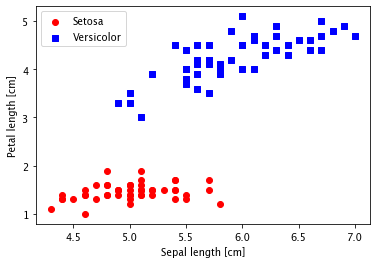

In [6]:
# Plot the data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [7]:
# Call the class
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)

# Fit the class on the (restricted) dataset
lrgd.fit(X,y);

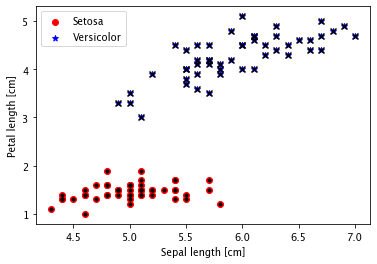

In [9]:
# Plot the predicted data
y_pred = lrgd.predict(X)

plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='*', label='Versicolor')

dict_iris = {0: '.', 1: 'x'}

for j in np.arange(100):
    plt.scatter(X[j, 0], X[j, 1],
            color='black', marker=dict_iris[y_pred[j]])


plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

### EXAMPLE 2: two classes, all features

In [11]:
# We repeat now the experiments by considering all the features
X_all = df.iloc[0:100, :4].values

In [12]:
# Call the class
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)

# Fit the class on the (extended) dataset
lrgd.fit(X_all,y);

In [13]:
# We can check the prediction with the predict function
lrgd.predict(X_all)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [149]:
# We can print the class-probabilities
lrgd.activation(lrgd.net_input(X_all))

array([9.80388617e-04, 3.88438418e-03, 1.85066153e-03, 5.41511499e-03,
       8.17776174e-04, 1.29850488e-03, 2.08416032e-03, 1.96603819e-03,
       6.95892085e-03, 3.74130715e-03, 7.12226299e-04, 3.28703727e-03,
       3.51012491e-03, 1.57387235e-03, 8.23638328e-05, 1.42904444e-04,
       2.83815901e-04, 1.16083506e-03, 1.14899056e-03, 8.04951737e-04,
       3.20865476e-03, 1.22225433e-03, 2.33987188e-04, 8.32580435e-03,
       1.02190268e-02, 7.74058244e-03, 4.02539296e-03, 1.34018833e-03,
       1.17529804e-03, 5.77103620e-03, 6.91177689e-03, 2.10514003e-03,
       2.54362072e-04, 1.31146975e-04, 3.74130715e-03, 1.03420406e-03,
       5.11962362e-04, 3.74130715e-03, 3.72067193e-03, 1.83805997e-03,
       8.49145294e-04, 2.30739456e-02, 2.26470006e-03, 4.39970943e-03,
       4.35035507e-03, 4.91598835e-03, 9.94143018e-04, 2.89316431e-03,
       7.61876166e-04, 1.72427932e-03, 9.99193646e-01, 9.99027926e-01,
       9.99767999e-01, 9.99470143e-01, 9.99737219e-01, 9.99685674e-01,
      

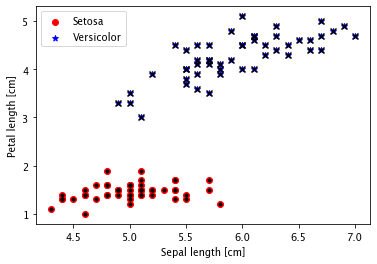

In [15]:
# Plot the predicted data

# We have 4 features, so we can not plot all of them. 
# But we can choose a subset of two features (or three for a 3D plot)

y_pred = lrgd.predict(X_all) # of course the prediction uses all of them!!

# Select features to plot:
ftp = [0, 2]

plt.scatter(X_all[:50, ftp[0]], X_all[:50, ftp[1]],
            color='red', marker='o', label='Setosa')
plt.scatter(X_all[50:100, ftp[0]], X_all[50:100, ftp[1]],
            color='blue', marker='*', label='Versicolor')

dict_iris = {0: '.', 1: 'x'}

for j in np.arange(100):
    plt.scatter(X_all[j, ftp[0]], X_all[j, ftp[1]],
            color='black', marker=dict_iris[y_pred[j]])

dict_features = {0: 'Sepal length [cm]', 1: 'Sepal width [cm]', 2: 'Petal length [cm]', 3: 'Petal width [cm]'}
plt.xlabel(dict_features[ftp[0]])
plt.ylabel(dict_features[ftp[1]])
plt.legend(loc='upper left')

plt.show()

### EXAMPLE 3: OvA for multiclass

In [81]:
# We now want to work with all the three classes

In [89]:
# We create the dataset
# Using integer labels is a recommended approach to avoid technical glitches
# and improve computational performance due to a smaller memory footprint.
y_all = df.iloc[:, 4].values
y_all = np.where(y_all == 'Iris-setosa', 0, y_all)
y_all = np.where(y_all == 'Iris-versicolor', 1, y_all)
y_all = np.where(y_all == 'Iris-virginica', 2, y_all)

X_all2 = df.iloc[:, :4].values

In [90]:
print('Class labels:', np.unique(y_all))

Class labels: [0 1 2]


In [91]:
probabilities = np.zeros((X_all2.shape[0], 3))

for k in range(3): # k=0, 1, 2
    y_k = np.where(y_all == k, 1, 0)
    
    lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
    lrgd.fit(X_all2, y_k)
    probabilities[:, k] = lrgd.activation(lrgd.net_input(X_all2))
    

In [94]:
probabilities

array([[9.98426397e-01, 1.98703267e-01, 6.53709960e-10],
       [9.94462530e-01, 5.89366925e-01, 5.36594703e-09],
       [9.97161836e-01, 2.62778257e-01, 3.49954053e-09],
       [9.92306781e-01, 3.71812120e-01, 1.60275735e-08],
       [9.98656379e-01, 1.16887028e-01, 6.63423575e-10],
       [9.97905240e-01, 4.76534951e-02, 7.89967529e-10],
       [9.96755553e-01, 8.35891394e-02, 6.66592514e-09],
       [9.96997734e-01, 2.64139097e-01, 1.89581041e-09],
       [9.90327245e-01, 4.51016143e-01, 3.42252414e-08],
       [9.94647682e-01, 6.24955952e-01, 3.94039380e-09],
       [9.98831738e-01, 1.78773413e-01, 2.24244617e-10],
       [9.95112522e-01, 2.17118462e-01, 5.57969559e-09],
       [9.94966977e-01, 6.47014793e-01, 4.58200465e-09],
       [9.97562044e-01, 3.11311087e-01, 5.51615288e-09],
       [9.99843242e-01, 8.04227627e-02, 6.73454548e-12],
       [9.99726768e-01, 7.94161575e-03, 2.82663498e-11],
       [9.99492113e-01, 2.80840022e-02, 1.27005179e-10],
       [9.98147756e-01, 1.37449

In [96]:
# For O-vs-A the sum of the rows is not 1
np.sum(probabilities, axis = 1)

array([1.19712967, 1.58382946, 1.2599401 , 1.36411892, 1.11554341,
       1.04555874, 1.0803447 , 1.26113683, 1.44134342, 1.61960364,
       1.17760515, 1.21223099, 1.64198178, 1.30887314, 1.080266  ,
       1.00766838, 1.02757611, 1.13559734, 1.17621803, 1.04653789,
       1.50546342, 1.04535608, 1.03308362, 1.17861258, 1.2810734 ,
       1.68662855, 1.13941158, 1.25530465, 1.31537386, 1.34165709,
       1.49244885, 1.24310912, 1.03876051, 1.02595427, 1.61960364,
       1.35822889, 1.32189815, 1.61960364, 1.31233104, 1.30148467,
       1.10094573, 1.85273553, 1.16112147, 1.03713174, 1.04649672,
       1.42385985, 1.08075122, 1.24693405, 1.15032523, 1.32219617,
       0.95213898, 0.74434985, 0.98028404, 1.106713  , 1.01674513,
       1.0662956 , 0.61121017, 0.90476782, 0.99026134, 0.70943257,
       1.03414324, 0.64540416, 1.01062642, 1.06141031, 0.6005257 ,
       0.91508977, 0.84053168, 0.98417896, 1.38132143, 0.98545475,
       0.85602662, 0.91870579, 1.53059288, 1.0584036 , 0.95536

In [95]:
# We can choose the prediction with the argmax function
np.argmax(probabilities, axis =1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2])

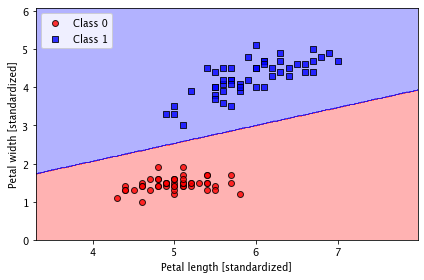

In [8]:
# We plot the decision boundary
plot_decision_regions(X=X, 
                      y=y,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()